### Q1 - Pixel Transform:


Select an image of your choice to demonstrate performing the following pixel transforms. For each transform show the original image next to the transformed image.

- Selecting an Image:

In [237]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../sample_data/uv.JPG')
# Convert from BGR to RGB:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [238]:
def para_plots(img1, img2):
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
    fig.tight_layout()
    ax[0].set_title('Original Image')
    ax[0].imshow(img1)
    ax[1].set_title('Modified Image')
    ax[1].imshow(img2)
    

- **Translation:**

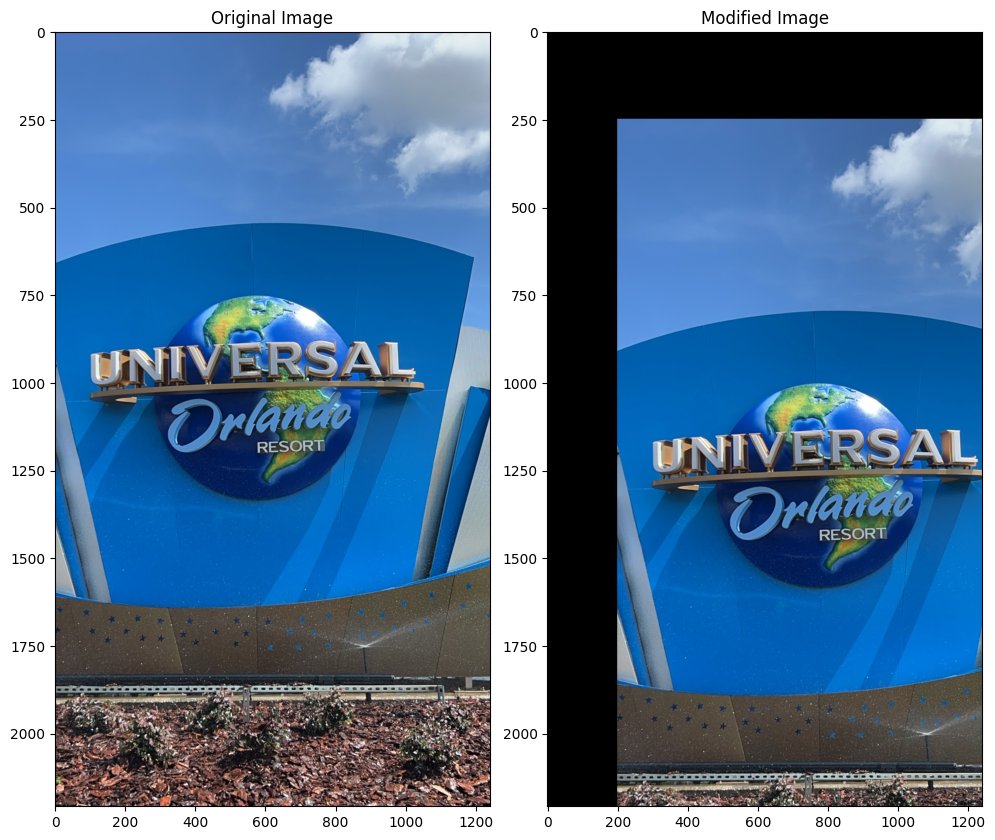

In [239]:
# image shape:
img_shape = img.shape

height = img_shape[0]
width = img_shape[1]

# Create an indentity matrix
identity_matrix = np.eye(3)
# Modify the translation part:
identity_matrix[0,2] = 200 # x
identity_matrix[1,2] = 250 # y

imageWarped = cv2.warpPerspective(img,identity_matrix,(width, height))
para_plots(img1=img, img2=imageWarped)




- **Rotation:**

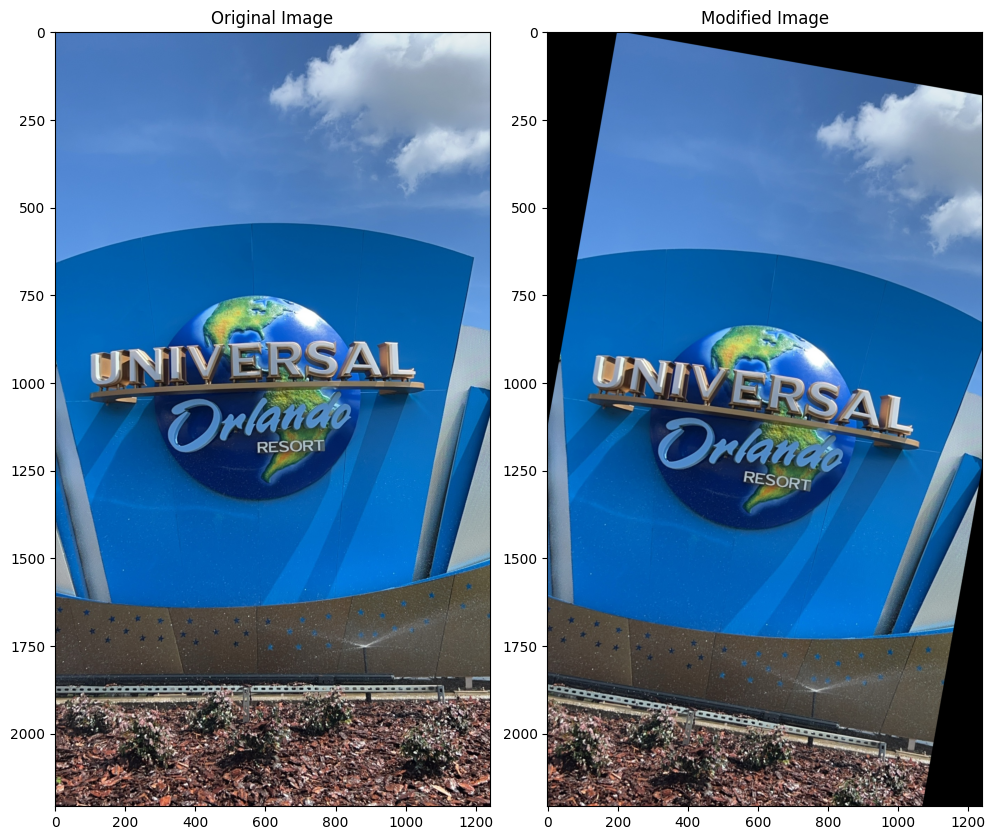

In [240]:
theta = 10.0*(np.pi/180.0)

x_axis_rotation_point = 200 # move the image right or left
y_axis_rotation_point = 0   # move the image up or down
translation = [0.0,0.0,1.0]

M = np.array([[np.cos(theta),-np.sin(theta), x_axis_rotation_point],
              [np.sin(theta),np.cos(theta), y_axis_rotation_point],
              translation
              ])

imageWarped = cv2.warpPerspective(img,M,(width,height))
para_plots(img1=img,img2=imageWarped)

- **Scaling:**
    * Scale the rotated image above

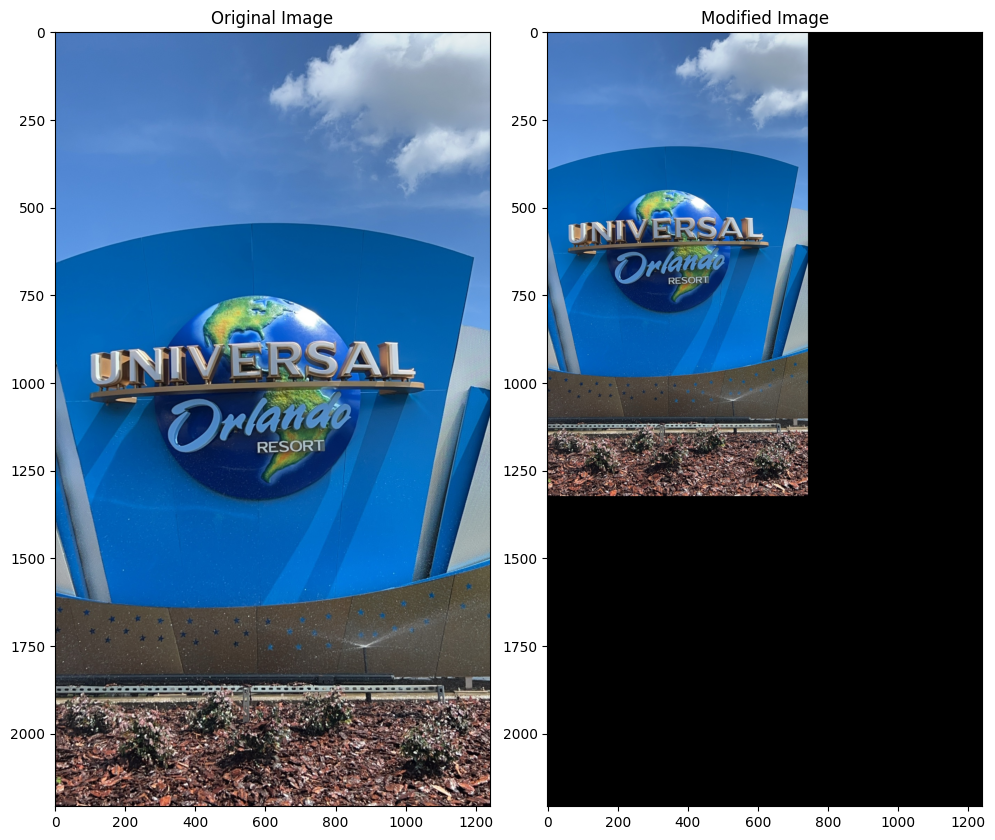

In [241]:
a = 0.6 # resize the image
b = 0.0 # rotate the image
tx = 0  # move the image along the x-axis
ty = 0  # move the image along the y-axis

# scaled = cv2.resize(img,(int(width*10),int(height*10)),interpolation=cv2.INTER_NEAREST)
M = np.array([[a,-b,tx],[b,a,ty],translation])
x = cv2.warpPerspective(img,M,(width,height))
para_plots(img1=img,img2=x)

- **Rotation, scaling, $\&$ Translation:**

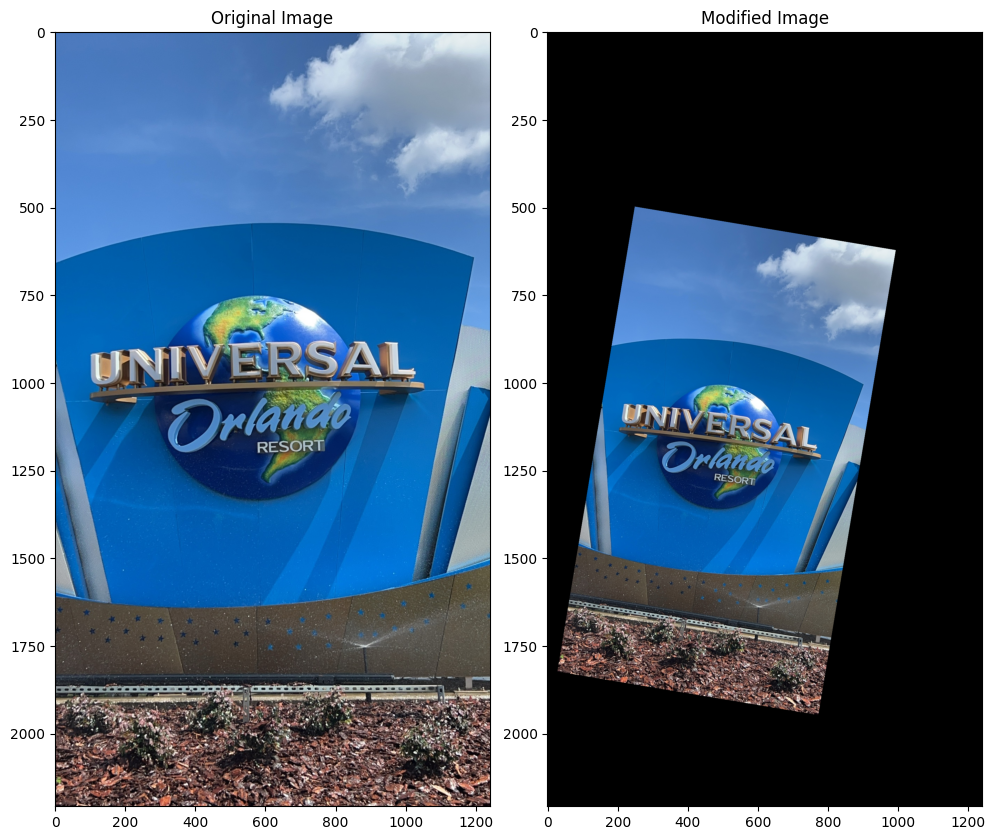

In [242]:
scale = 0.6 # resize the image (scaling)
rotate = 0.1 # rotate the image
tx = 250  # move the image along the x-axis
ty = 500  # move the image along the y-axis

M = np.array([[scale,-rotate,tx],[rotate,scale,ty],translation])
x = cv2.warpPerspective(img,M,(width,height))
para_plots(img1=img,img2=x)

- **Affine:**

[[ 9.e-01  1.e-01  0.e+00]
 [-4.e-01  6.e-01  8.e+02]
 [ 0.e+00  0.e+00  1.e+00]]


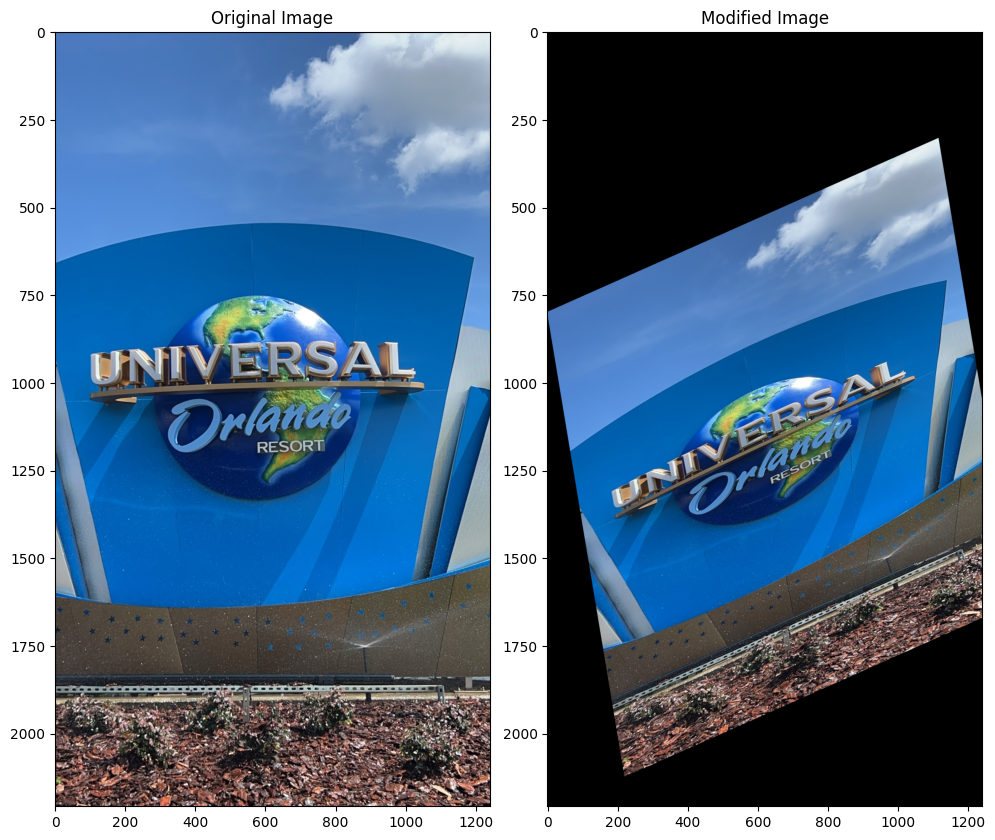

In [243]:
a00 =  0.9
a01 =  0.1
a10 = -0.4
a11 =  0.6
tx = 0
ty = 800

M = np.array([[a00,a01,tx],[a10,a11,ty],[0.0,0.0,1.0]])
print(M)

imageWarped = cv2.warpPerspective(img,M,(width,height))

para_plots(img1=img, img2=imageWarped)

### Q2: Perspective Transform.

- Determine the best projective transform that restores the image to a picture that is centered with the optical axis and does not contain any rotation, changes to aspect ratio, skew, or keystone distortion. You are welcome to use OpenCV and other tools to help with this.


------------
Here is the chosen image for this problem:
------------



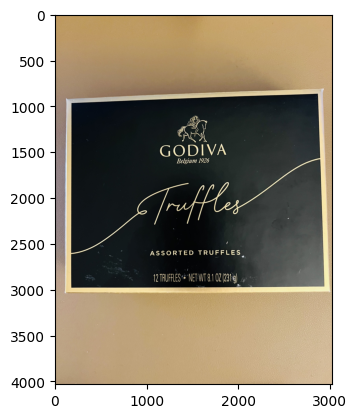

In [244]:
# import the image:

grid_img = cv2.imread('../sample_data/perspective_transform.jpg')
grid_img = cv2.cvtColor(grid_img,cv2.COLOR_BGR2RGB)

# Draw circles on the corners
def draw_circle(img,coordinates, color):
    for i in range(len(coordinates)):
        cv2.circle(img, center=coordinates[i], radius=30,color=color, thickness=-1)
print('\n------------\nHere is the chosen image for this problem:\n------------\n')
plt.imshow(grid_img)

I don't want to get a projection of the whole image. I only want to get the reflection of the box. Therefore, I specify four points (the corner of the Godiva box).

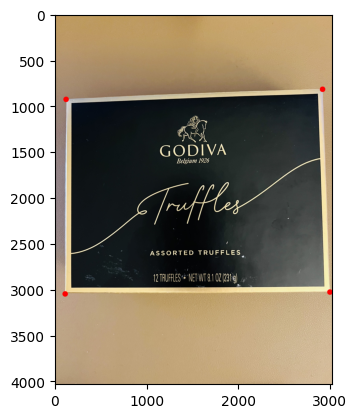

In [245]:
top_left_corner = (120,930)
top_right_corner = (2910,820)
bottom_left_corner = (110,3050)
bottom_right_corner = (2990,3030)
red = (255,0,0)
blue = (0,0,255)
img_cp = grid_img.copy()
src_coordinates = [top_left_corner,top_right_corner,bottom_left_corner,bottom_right_corner]
draw_circle(img=img_cp, coordinates=src_coordinates, color=red)
plt.imshow(img_cp)

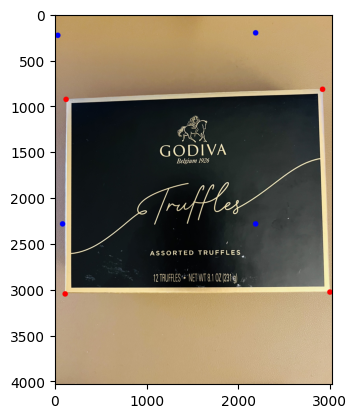

In [246]:

# manually mapping between source and dest.

top_left_corner_dest = (int(top_left_corner[0]/4), int(top_left_corner[1]/4))
top_right_corner_dest = (int(3 * top_right_corner[0]/4), int(top_right_corner[1]/4))
bottom_left_corner_dest = (int(3 * bottom_left_corner[0]/4), int(3 * bottom_left_corner[1]/4))
bottom_right_corner_dest = (2182, 2287)
# print(bottom_left_corner_dest[0])
# print(bottom_left_corner_dest[1])

dest_coordinates = [top_left_corner_dest,top_right_corner_dest,bottom_left_corner_dest, bottom_right_corner_dest]
draw_circle(img=img_cp,coordinates=dest_coordinates,color=blue)
plt.imshow(img_cp)

In [247]:
src_points = np.float32(src_coordinates)
dest_points = np.float32(dest_coordinates)
output_width = max(top_right_corner_dest[0], bottom_right_corner_dest[0])
output_height = max(top_left_corner_dest[0], bottom_left_corner_dest[1])
perspective_matrix = cv2.getPerspectiveTransform(src_points, dest_points)
results = cv2.warpPerspective(grid_img,perspective_matrix,(output_width,output_height))

In [248]:
print('Perspective Matrix:\n',perspective_matrix)

Perspective Matrix:
 [[ 8.16829103e-01  3.12899207e-02 -9.63102892e+01]
 [ 3.39926357e-02  1.05831329e+00 -7.50055531e+02]
 [ 1.18405752e-05  2.74624887e-05  1.00000000e+00]]


Original and restored image



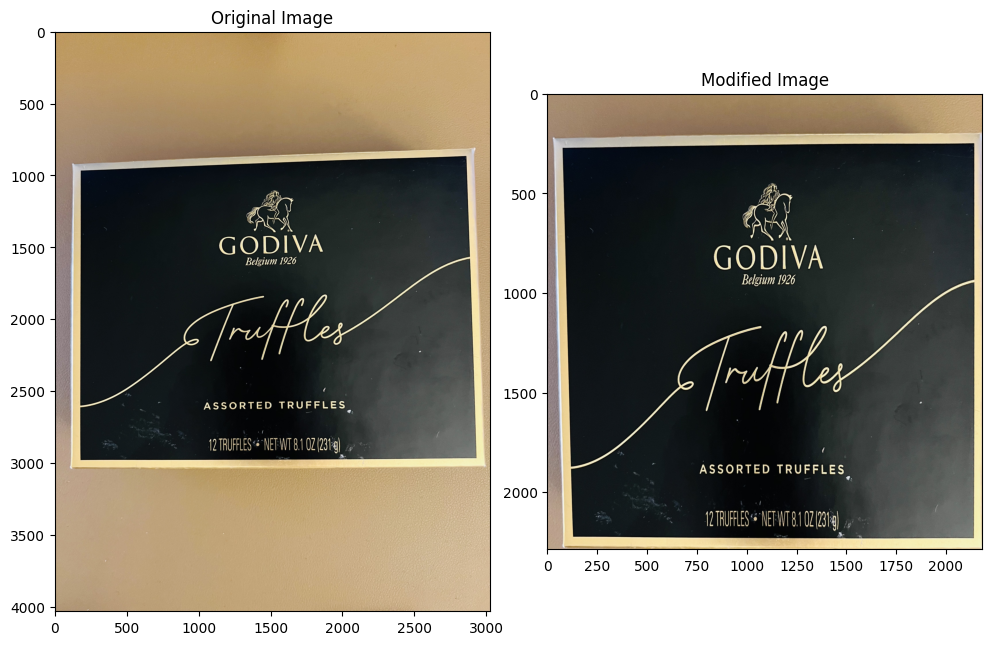

In [249]:
print('Original and restored image\n')
para_plots(img1=grid_img, img2=results)

**Please ignore the following. A failed maethod to use L1 norm to get the projected points on the other side of the plane**

In [250]:

# width_top_corners = np.sqrt(((top_left_corner[0] - top_right_corner[0]) ** 2) +
#                             ((top_left_corner[1] - top_right_corner[1]) ** 2)
#                             )

# width_bottom_corners = np.sqrt(((bottom_left_corner[0] - bottom_right_corner[0]) ** 2) +
#                                ((bottom_left_corner[1] - bottom_right_corner[1]) ** 2)
#                                )

# max_width = max(int(width_top_corners), int(width_bottom_corners))

# height_left_corners = np.sqrt(((top_left_corner[0] - bottom_left_corner[0]) ** 2) +
#                              ((top_left_corner[1] - bottom_left_corner[1]) ** 2)
#                              )

# height_right_corners = np.sqrt(((top_right_corner[0] - bottom_right_corner[0]) ** 2) +
#                                 ((top_right_corner[1] - bottom_right_corner[1]) ** 2)
#                                 )
# max_height = max(int(height_left_corners), int(height_right_corners))

# src_points = np.float32(src_coordinates)
# dest_points = np.float32([[0,0],
#                           [0, max_height],
#                           [max_width, max_height],
#                           [max_width - 1,0]])
# perspective_matrix = cv2.getPerspectiveTransform(src_points, dest_points)
# results = cv2.warpPerspective(grid_img, perspective_matrix,(width, height), flags=cv2.INTER_LINEAR)
# plt.imshow(results)

## Sources used for this HW:
    1- 